In [1]:
path = '/home/victor/Downloads/acoes-listadas.csv'
import pandas as pd
df = pd.read_csv(path)
df['Código'] = df['Código']+'.SA'
json = []
for _, codigo in df.itertuples():
    json.append({'value': codigo, 'label':codigo})

In [2]:
import yfinance as yf

<Axes: xlabel='Date'>

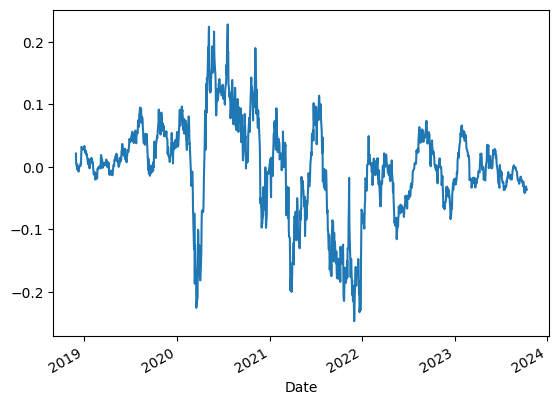

In [6]:
import numpy as np

ticket = yf.Ticker('MGLU3.SA')
df = ticket.history('5y')
df['Values'] = df.Close.rolling(30).mean()
df.Values = df.Values.diff()
df.Values.plot()


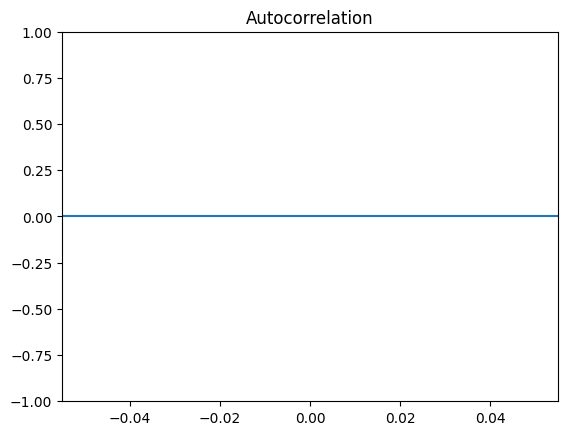

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df.Values.values, lags=20)
plt.show()


In [32]:
from prophet import Prophet
def predict(dataset, days=90):
    m = Prophet(changepoint_range=0.9, interval_width=0.9)
    df_pred = pd.DataFrame()
    df_pred['ds'] = dataset.index
    df_pred.ds = df_pred.ds.apply(lambda x: x.date())
    df_pred['y'] = dataset.Close.values
    m.fit(df_pred.dropna())
    future = m.make_future_dataframe(days)
    forecast = m.predict(future)
    forecast['media'] = dataset.Close.rolling(30).mean()
    forecast['y'] = dataset.Close
    forecast = forecast[['ds', 'media', 'yhat', 'yhat_upper', 'yhat_lower', 'trend', 'trend_upper', 'trend_lower', 'y']]
    return forecast
forecast = predict(df)




17:32:38 - cmdstanpy - INFO - Chain [1] start processing
17:32:38 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
import plotly.express as px
forecast['media'] = forecast.y.rolling(30).mean()
px.line(forecast, x='ds', y=['media', 'yhat', 'yhat_upper', 'yhat_lower', 'trend', 'trend_upper', 'trend_lower'])

/home/victor/Área de Trabalho/react+django/venv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [65]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dfteste = adfuller(dataset, autolag= 'AIC')
    print(f'1. ADF: {dfteste[0]}')
    print(f'2. P-Value: {dfteste[1]}')
    print(f'3. Num of Lags: {dfteste[2]}')
    print(f'4. Num of Observations Used for ADF Regression and Critical Values Calculations: {dfteste[3]}')
    print(f'5. Critical Values')
    for key, val in dfteste[4].items():
        print(f'\t {key} --> {val}')

ad_test(df.Values.dropna())



1. ADF: -0.6651981175909102
2. P-Value: 0.855559280734765
3. Num of Lags: 23
4. Num of Observations Used for ADF Regression and Critical Values Calculations: 1187
5. Critical Values
	 1% --> -3.4358710597388042
	 5% --> -2.863977991064458
	 10% --> -2.5680680340944337


In [66]:


model = ARIMA(order=(2,0,0))

TypeError: ARIMA.__init__() missing 1 required positional argument: 'endog'

In [46]:
model.predict(params=df.Close)

NotImplementedError: 

In [36]:
excludes = ['address1','address2','city','state','zip', 'country', 'phone','website', 'industryKey', 'industryDisp','sectorKey','sectorDisp', 'companyOfficers']
excludes += ['previousClose','open','dayLow', 'dayHigh','maxAge','longBusinessSummary', 'volume', 'symbol']
excludes += ['underlyingSymbol', 'shortName', 'timeZoneFullName', 'timeZoneShortName', 'uuid', 'messageBoardId']
excludes += ['firstTradeDateEpochUtc','gmtOffSetMilliseconds', 'financialCurrency', 'trailingPegRatio']
print(len(excludes))
print(len(df.info.keys()))
for keys, value in df.info.items():
    if keys not in excludes:
        print(f"'{keys}',", end=' -> ')
        print(value)

31
124
'industry', -> Oil & Gas Integrated
'sector', -> Energy
'fullTimeEmployees', -> 45149
'auditRisk', -> 2
'boardRisk', -> 5
'compensationRisk', -> 1
'shareHolderRightsRisk', -> 10
'overallRisk', -> 4
'governanceEpochDate', -> 1696118400
'priceHint', -> 2
'regularMarketPreviousClose', -> 35.21
'regularMarketOpen', -> 35.14
'regularMarketDayLow', -> 34.49
'regularMarketDayHigh', -> 35.25
'dividendRate', -> 7.54
'dividendYield', -> 0.2141
'exDividendDate', -> 1692662400
'fiveYearAvgDividendYield', -> 15.86
'beta', -> 1.096971
'trailingPE', -> 2.9291077
'forwardPE', -> 4.525773
'regularMarketVolume', -> 41578500
'averageVolume', -> 49938260
'averageVolume10days', -> 48314740
'averageDailyVolume10Day', -> 48314740
'bid', -> 35.03
'ask', -> 35.09
'bidSize', -> 0
'askSize', -> 0
'marketCap', -> 480898121728
'fiftyTwoWeekLow', -> 20.77
'fiftyTwoWeekHigh', -> 38.39
'priceToSalesTrailing12Months', -> 0.8269063
'fiftyDayAverage', -> 32.7394
'twoHundredDayAverage', -> 28.13525
'trailingAnnual